<h1>A Study of COVID-19 Cases</h1>
<h2>Objective of Experiment</h2>
The goal and objective of this experiment is to look at and compare results of SARS-COVID-2 across multiple countries and across each state. The data for this experiment comes from the John Hopkins University data repository, which gathers data from seven different sources and allows for it to be studied. This journal will try to compare this data not only to show the difference of how each government handled the virus, but to previous pandemics and the influenza.

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

import glob
import us
import math

import copy
import random

import matplotlib
import matplotlib.pyplot as plt

import git

import time
%matplotlib inline

<h2>Data File Location and Extraction</h2>
Set location of data for cases collected by WHO for cases and deaths worldwide as well as data that has been collected for the United States. Goal will be to observe and compare the differences amongst a group of 10 countries (United States, Japan, China, Germany, South Korea, England, Spain, Italy, Iran, and Switzerland) to each other and compare each state. The goal is to have a visible representation of the effects of the virus and compare how it has been handled across different governments with the amount of time they had to react. To pull and use the data that will be displayed in the following sections, please see README for the John Hopkins University data repository.

<h3>Extracting Data</h3>
Based on the project setup, regardless of location of project folder, the data should exist in a folder cloned from the John Hopkins repository. Once this data is available, the system will concat all the US data and global data from WHO up to the last date that it was updated. The first twenty-five rows of both data sets are provided for viewing, and verification that everything is correctly setup.

In [38]:
try:
    updateCOVID=git.cmd.Git('COVID-19/')
    updateCOVID.pull()
except:
    try:
        git.Git(os.getcwd()).clone('https://github.com/CSSEGISandData/COVID-19.git')
        print('Data Repository cloned and placed in working directory')
    except:
        print('Please ensure that you have a connection to the interent to either clone or pull in data directory')
else:
    print('Everything up-to-date')


Data Repository cloned and placed in working directory


In [3]:
dataCSSEPath=r'COVID-19\csse_covid_19_data\csse_covid_19_time_series'

dataUSCases=pd.read_csv(dataCSSEPath + r'\time_series_covid19_confirmed_US.csv')
dataUSDeaths=pd.read_csv(dataCSSEPath + r'\time_series_covid19_deaths_US.csv')
dataGlobalCases=pd.read_csv(dataCSSEPath + r'\time_series_covid19_confirmed_global.csv')
dataGlobalDeaths=pd.read_csv(dataCSSEPath + r'\time_series_covid19_deaths_global.csv')

In [4]:
dataUSCases[0:25]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,303,307,309,310,310,310,312,312,313,314
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,31,31,31,31,33,33,33,36,36,37
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,8714,8745,8862,9137,9366,9654,10010,10123,10379,10574
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,116,122,144,153,167,181,206,206,243,249
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,636,643,653,662,676,698,715,733,743,765
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,980,1039,1114,1170,1207,1277,1341,1396,1499,1579
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,357,362,367,377,394,399,402,413,426,444
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,196,198,208,215,221,224,227,232,238,243
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,251,258,273,281,296,320,331,344,367,395


In [5]:
dataUSDeaths[0:25]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,157,159,159,159,167,167,167,169,171,172
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,6,6,6,6,6,6,6,6,6,6
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,12,12,13,14,14,15,15,17,18,19
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,9,9,10,11,11,11,11,11,12,13
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,2,2,2,2,2,2,2,3,3,3
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1,1,1,1,1,1,1,2,2,2
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1,1,1,1,1,1,1,1,1,1


In [6]:
dataGlobalCases[0:25]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,858,861,862,877
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,386,386,396,458,462,506,525,541,576,607
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,70,70,73,74,74,74,74,74,74,74
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,83426,87030,90693,94060,97509,100166,103265,106910,111146,114783
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,29285,29820,30346,30903,31392,31969,32151,32490,33005,33559
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,111,112,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3440,3453,3467,3474,3478,3492,3505,3517,3527,3535


In [7]:
dataGlobalDeaths[0:25]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,920,936,957,971,994,1010,1012,1048,1094,1113
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,81,83,83,85,89,93,95,97,101,104
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,968,978,988,996,1004,1011,1018,1028,1040,1052
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,21,21,22,23,23,26,26,26,27,28
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,1644,1694,1720,1774,1810,1845,1903,1968,2050,2112
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,503,521,535,546,559,565,573,581,592,607
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49


<h2>Creating Methods for States</h2>
The following methods provided below will be used to create the plots that will be used to display the number of cases in the United States tracked since the 21st of Janurary.

In [8]:
def plotCasesByState(state=None, byPopDensity=False):    
    i=0
    maxCases=0
    plt.clf()
    if byPopDensity:
        return
    else:
        if(state==None):
            states = us.states.STATES
            for state in states:
                data=np.array(np.sum(dataUSCases[dataUSCases.Province_State==state.name].T[11:], axis=1))
                if np.max(np.max(data)) > maxCases:
                    maxCases=np.max(np.max(data))
                plt.figure(i)
                plt.plot(data)
                plt.title('Number of Cases for SARS-COVID-2 for ' + state.name)
                plt.xlabel('Day of SARS-COVID-2')
                plt.ylabel('Number of Caes for SARS-COVID-2')
                i+=1

            for j in range(0,i):
                plt.figure(j)
                plt.ylim([0,maxCases*1.1])
        else:
            data=np.array(np.sum(dataUSCases[dataUSCases.Province_State==state.name].T[11:], axis=1))
            plt.title(state)
            plt.ylabel('Number of Cases for SARS-COVID-2')
            plt.xlabel('Day of SARS-COVID-2')
            plt.plot(data)
        
    plt.show()

In [9]:
def plotDeathsByState(state=None, byPopDensity=False):
    i=0
    maxDeaths=0
    plt.clf()
    if byPopDensity:
        return
    else:
        if(state==None):
            states = us.states.STATES
            for state in states:
                data=np.array(np.sum(dataUSDeaths[dataUSDeaths.Province_State==state.name].T[12:], axis=1))
                if np.max(np.max(data)) > maxDeaths:
                    maxDeaths=np.max(np.max(data))
                plt.figure(i)
                plt.plot(data)
                plt.title('Number of Cases for SARS-COVID-2 for ' + state.name)
                plt.xlabel('Day of SARS-COVID-2')
                plt.ylabel('Number of Caes for SARS-COVID-2')
                i+=1

            for j in range(0,i):
                plt.figure(j)
                plt.ylim([0,maxDeaths*1.1])
        else:
            data=np.array(np.sum(dataUSDeaths[dataUSDeaths.Province_State==state.name].T[12:], axis=1))
            plt.title(state)
            plt.ylabel('Number of Cases for SARS-COVID-2')
            plt.xlabel('Day of SARS-COVID-2')
            plt.plot(data)
        
    plt.show()

In [10]:
def plotRateOfDeathsByState(state=None, byPopDensity=False):
    i=0
    maxRate=0
    plt.clf()
    if byPopDensity:
        return
    else:
        if(state==None):
            states = us.states.STATES
            for state in states:
                dataCases=np.array(np.sum(dataUSCases[dataUSCases.Province_State==state.name].T[11:], axis=1))
                dataDeaths=np.array(np.sum(dataUSDeaths[dataUSDeaths.Province_State==state.name].T[12:], axis=1))
                if np.max(np.max(dataDeaths/dataCases)) > maxRate:
                    maxRate=np.max(np.max(dataDeaths/dataCases))
                plt.figure(i)
                plt.plot(dataDeaths/dataCases)
                plt.title('Number of Cases for SARS-COVID-2 for ' + state.name)
                plt.xlabel('Day of SARS-COVID-2')
                plt.ylabel('Number of Caes for SARS-COVID-2')
                i+=1

            for j in range(0,i):
                plt.figure(j)
                plt.ylim([0,maxRate*1.1])
        else:
            dataCases=np.array(np.sum(dataUSCases[dataUSCases.Province_State==state.name].T[11:], axis=1))
            dataDeaths=np.array(np.sum(dataUSDeaths[dataUSDeaths.Province_State==state.name].T[12:], axis=1))
            plt.title(state)
            plt.ylabel('Number of Cases for SARS-COVID-2')
            plt.xlabel('Day of SARS-COVID-2')
            plt.plot(dataDeaths/dataCases)
        
    plt.show()

In [11]:
def plotNumberOfCasesByCountry(country=None, byPopDensity=False):
    if byPopDensity:
        return
    else:
        if country==None:
            return
        else:
            data=np.array(np.sum(dataGlobalCases[dataGlobalCases['Country/Region']==country].T[11:], axis=1))
            plt.title(country)
            plt.ylabel('Number of Cases for SARS-COVID-2')
            plt.xlabel('Day of SARS-COVID-2')
            plt.plot(data)
        
    plt.show()

In [12]:
def plotNumberOfDeathsByCountry(country=None, byPopDensity=False):
    if byPopDensity:
        return
    else:
        if country==None:
            return
        else:
            data=np.array(np.sum(dataGlobalDeaths[dataGlobalDeaths['Country/Region']==country].T[11:], axis=1))
            plt.title(country)
            plt.ylabel('Number of Deaths for SARS-COVID-2')
            plt.xlabel('Day of SARS-COVID-2')
            plt.plot(data)
        
    plt.show()

In [13]:
def plotMortalityByCountry(country=None, byPopDensity=False):
    if byPopDensity:
        return
    else:
        if country==None:
            return
        else:
            dataCases=np.array(np.sum(dataGlobalCases[dataGlobalCases['Country/Region']==country].T[11:], axis=1))
            dataDeaths=np.array(np.sum(dataGlobalDeaths[dataGlobalDeaths['Country/Region']==country].T[11:], axis=1))
            plt.title(country)
            plt.ylabel('Number of Deaths for SARS-COVID-2')
            plt.xlabel('Day of SARS-COVID-2')
            plt.plot(dataDeaths/dataCases)
        
    plt.show()

<h2>Graphing Results</h2>
The following sections will contain the graphs based on the data provided by Johns Hopkins University. The first set show the number of cases, deaths, and rate of mortality in the United States as we have gotten further into the pandemic. After each section I will comment on some of the key states that have been of media publicity: Georgia, Florida, Arizona, New York, Texas, Washington, and California.

C:\Users\Quenton LaRoe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


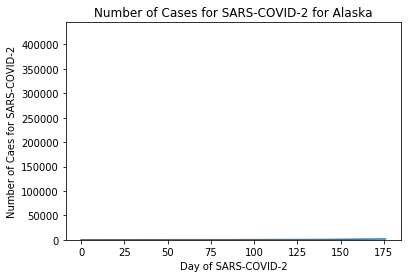

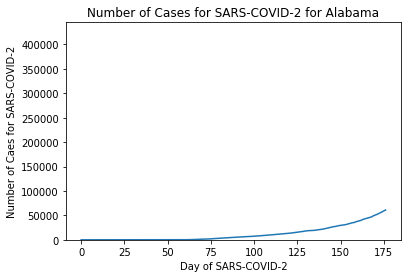

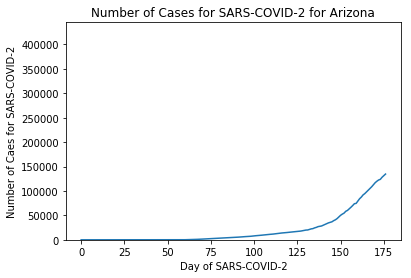

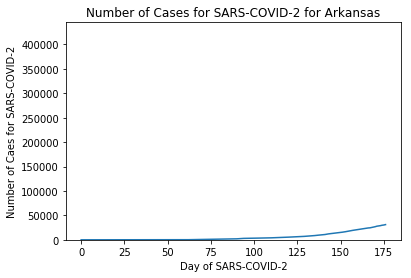

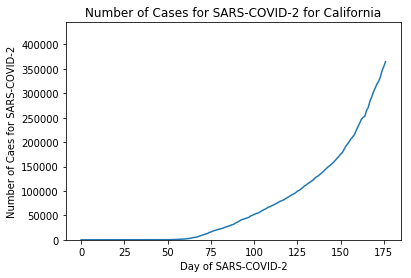

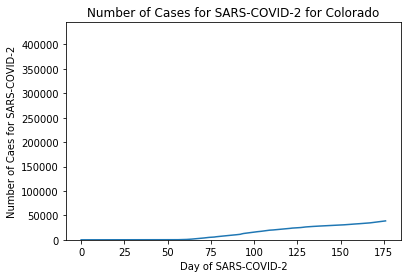

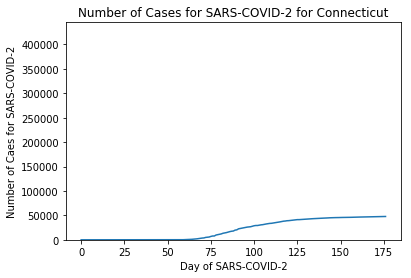

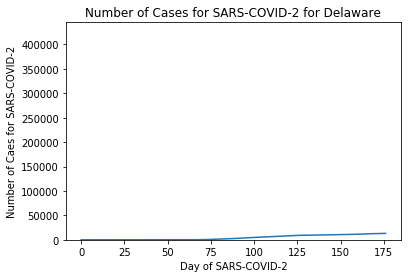

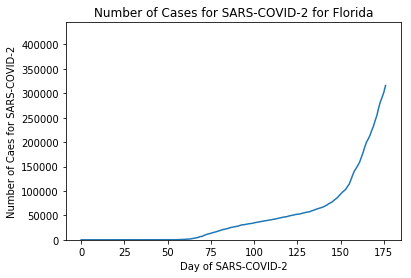

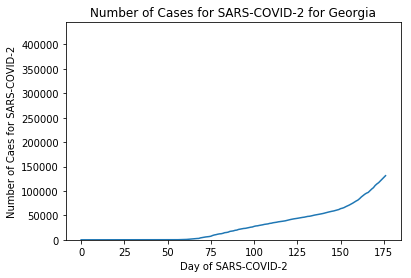

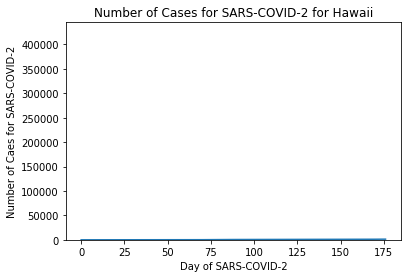

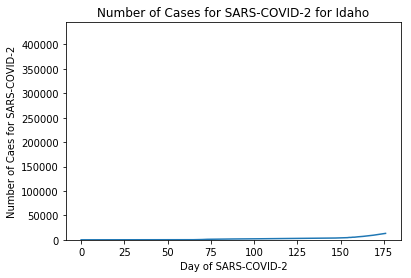

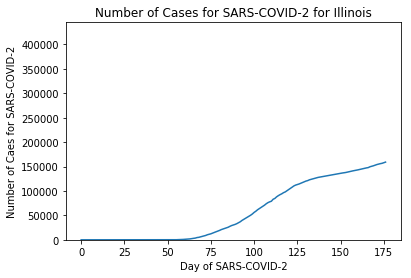

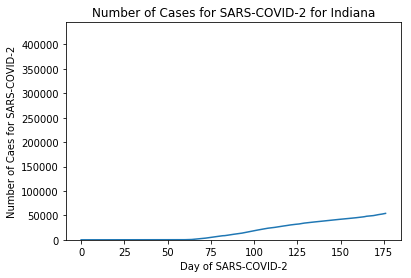

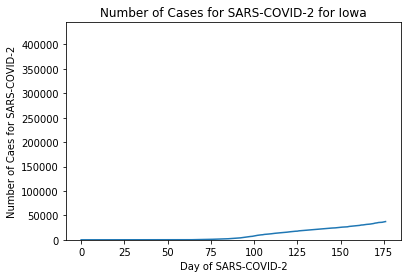

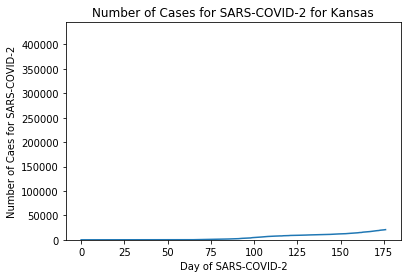

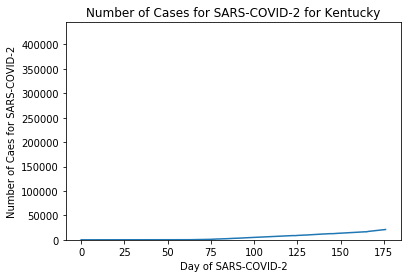

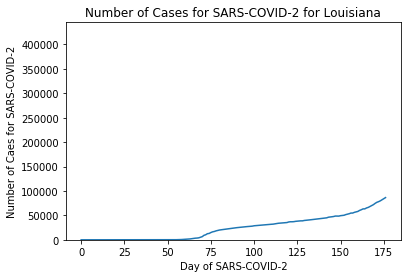

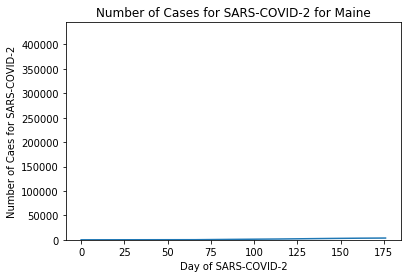

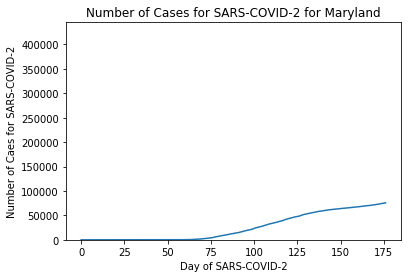

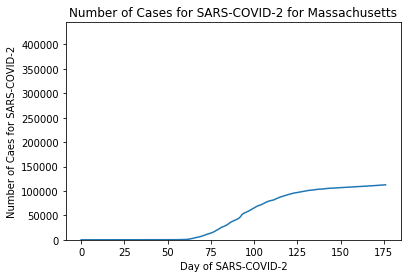

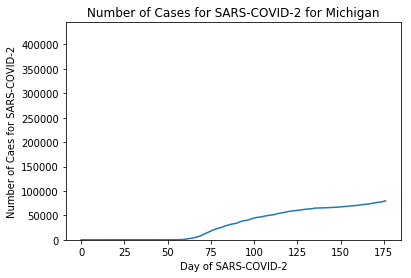

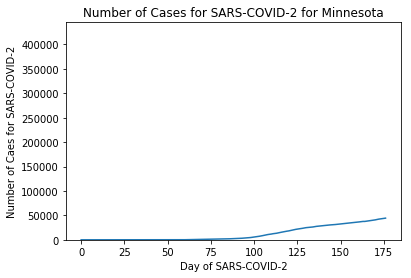

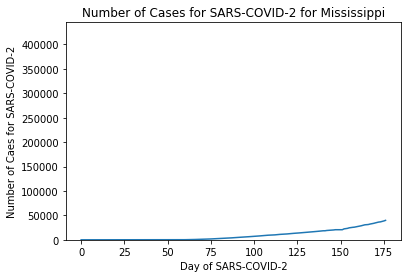

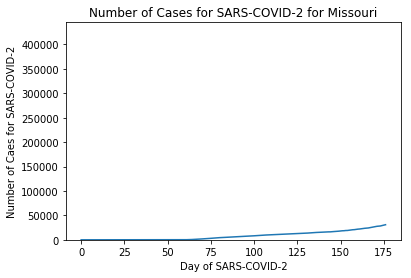

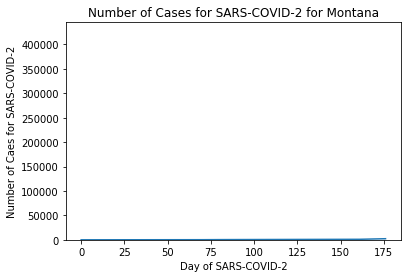

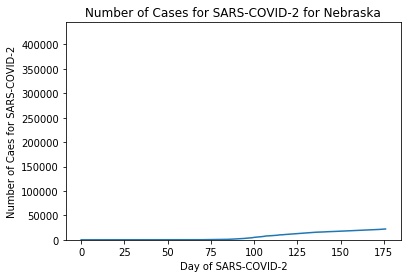

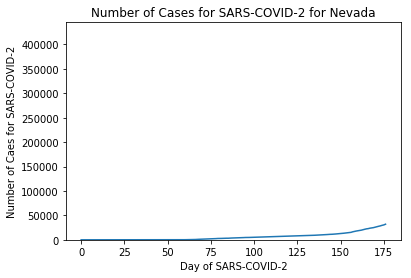

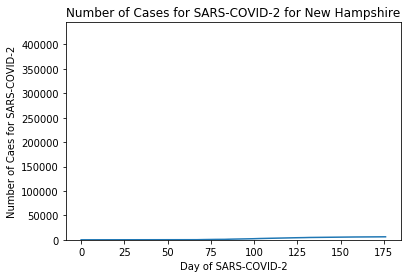

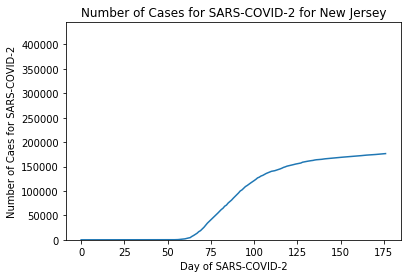

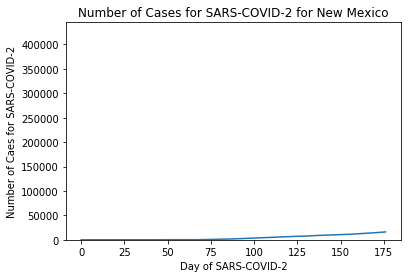

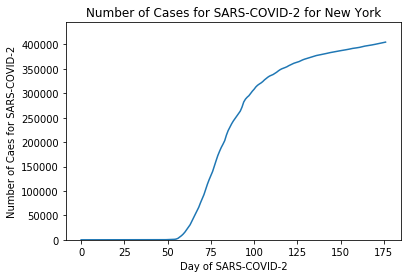

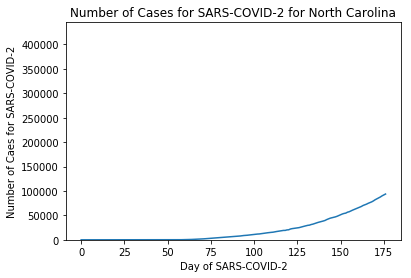

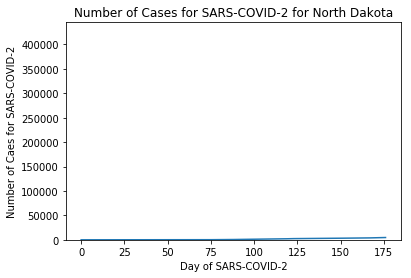

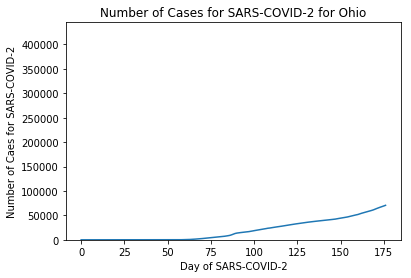

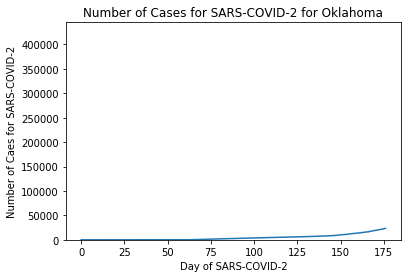

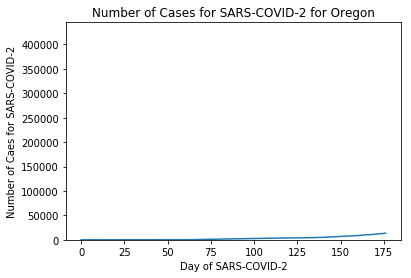

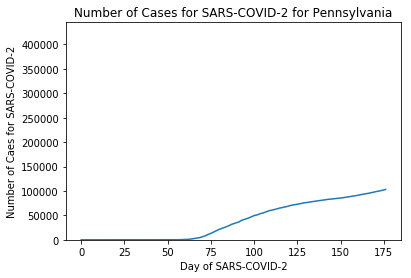

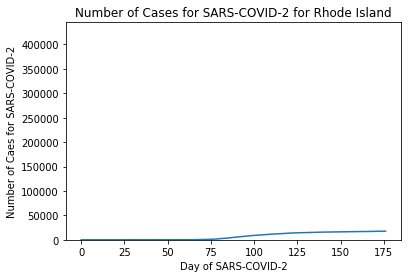

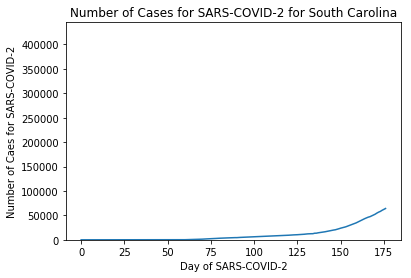

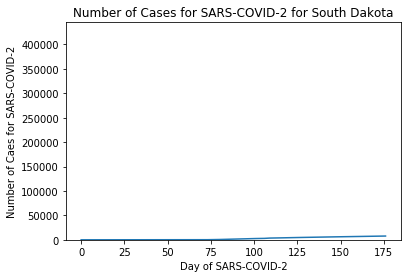

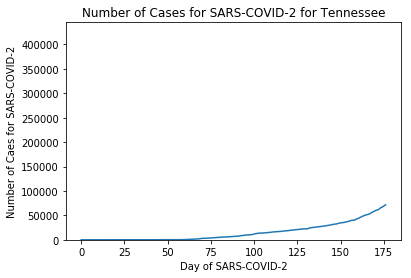

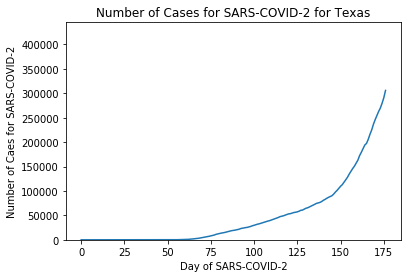

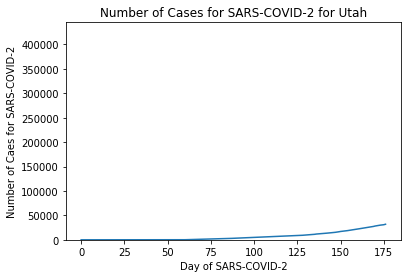

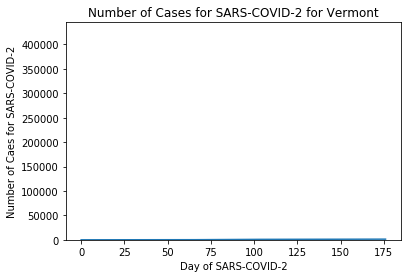

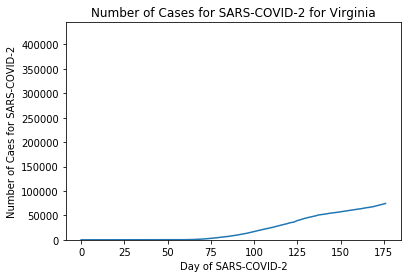

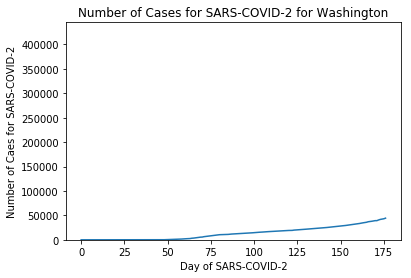

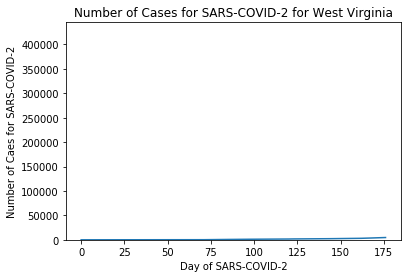

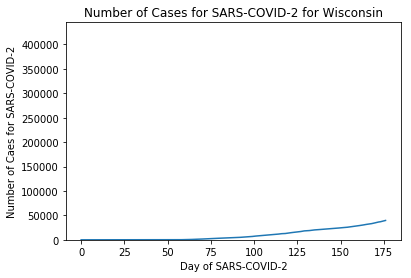

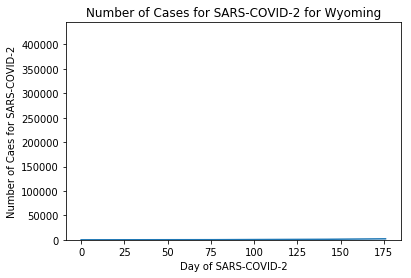

In [14]:
plotCasesByState()

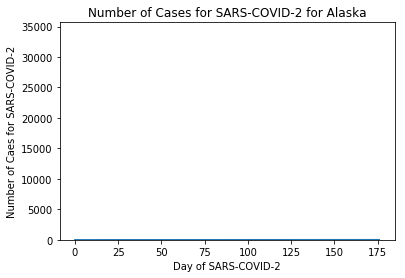

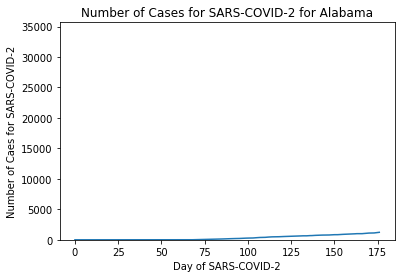

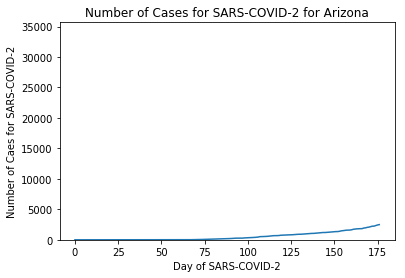

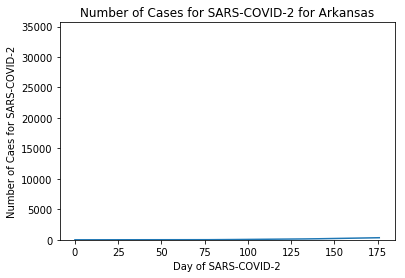

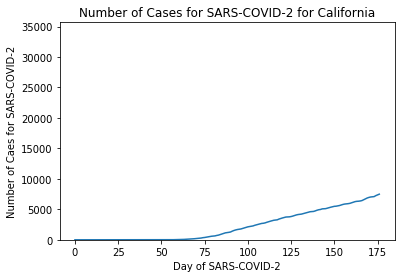

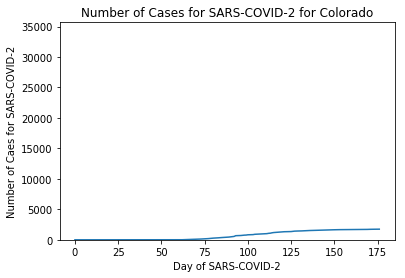

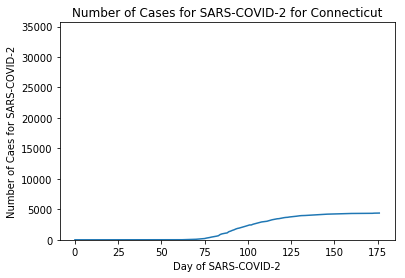

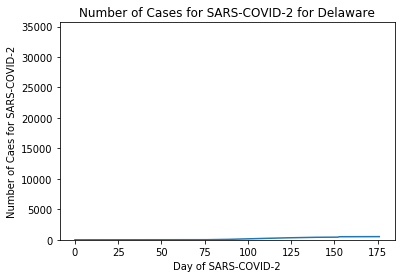

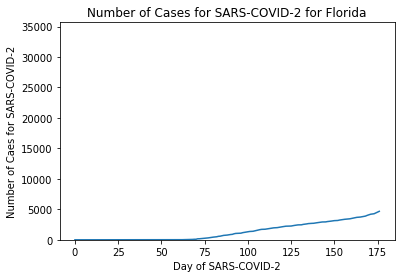

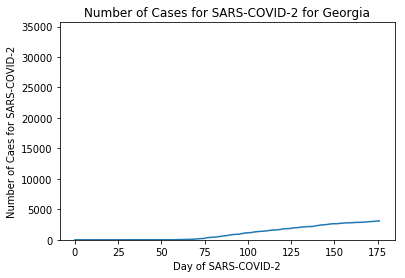

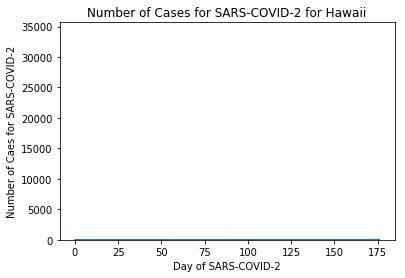

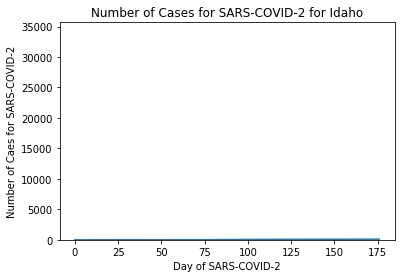

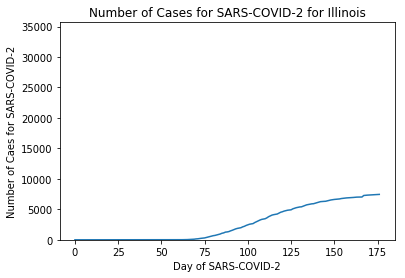

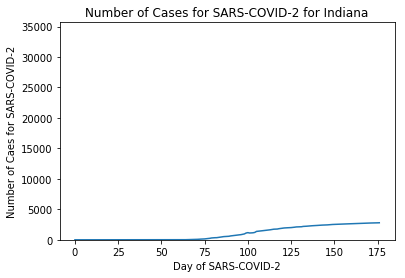

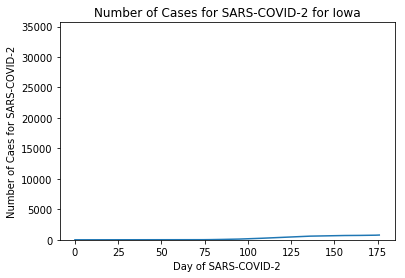

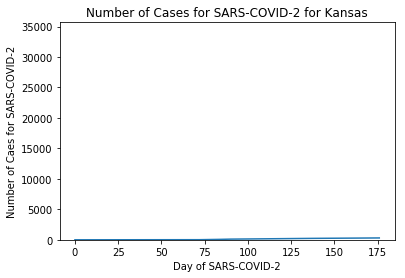

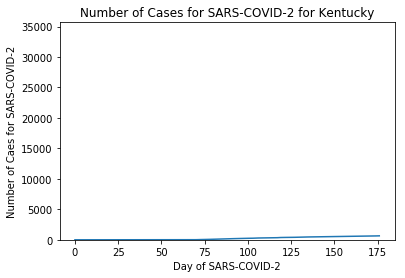

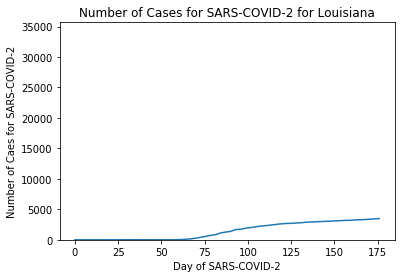

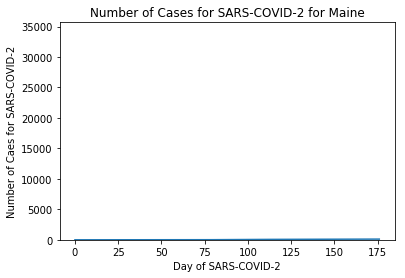

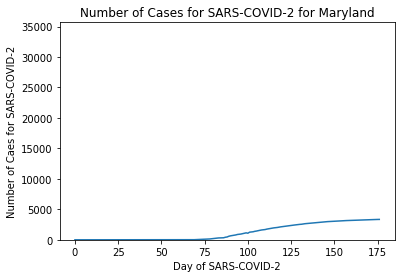

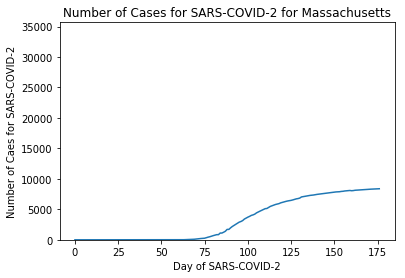

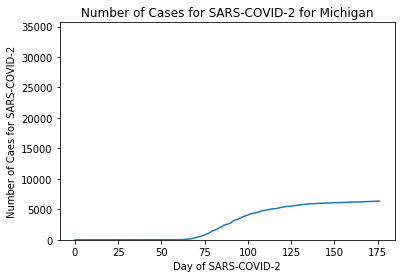

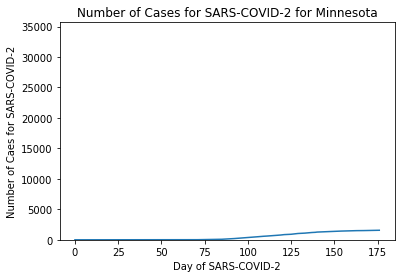

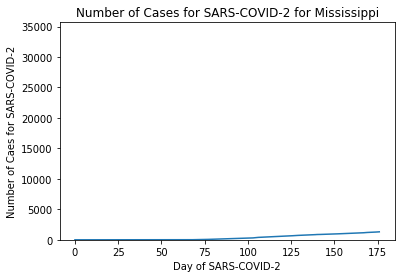

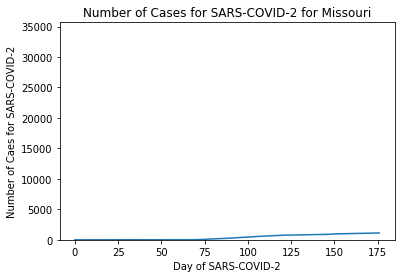

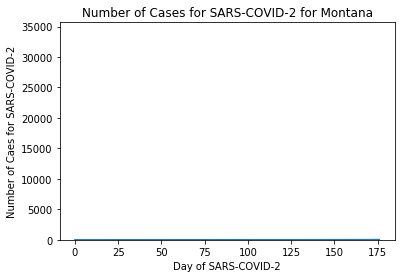

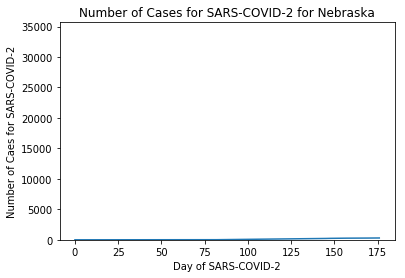

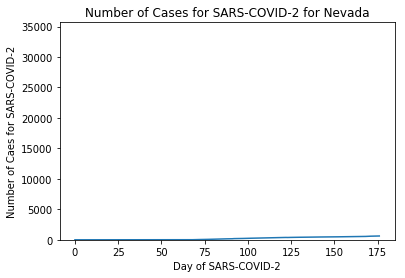

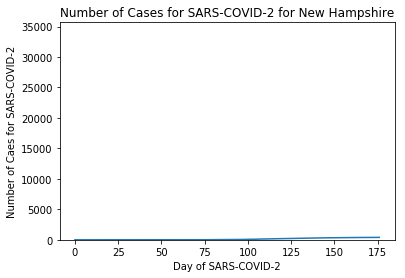

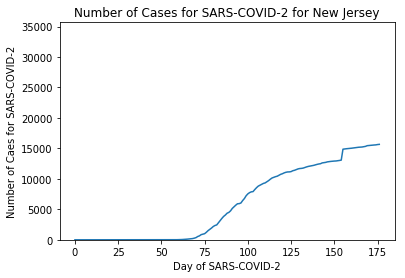

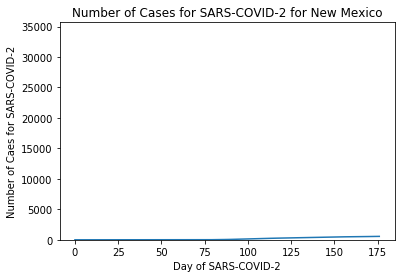

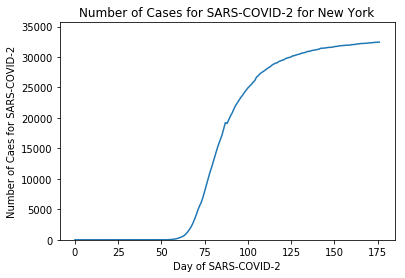

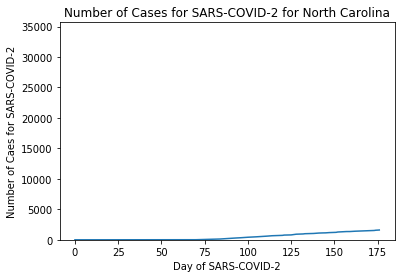

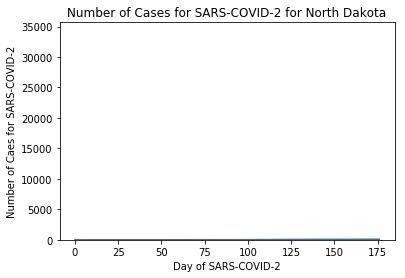

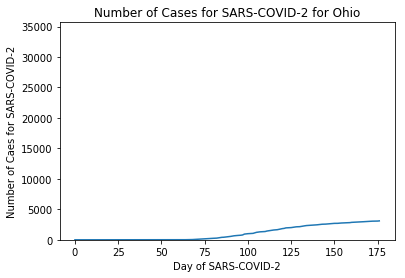

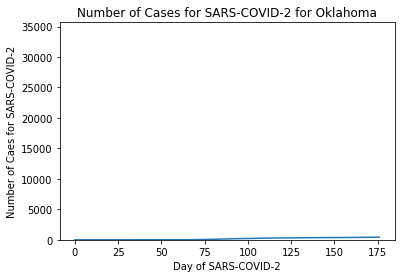

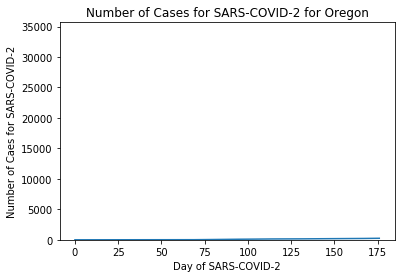

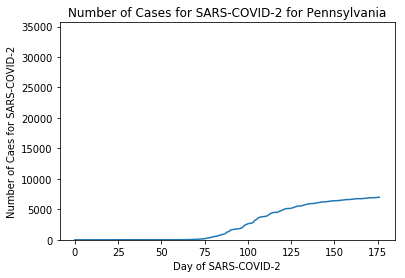

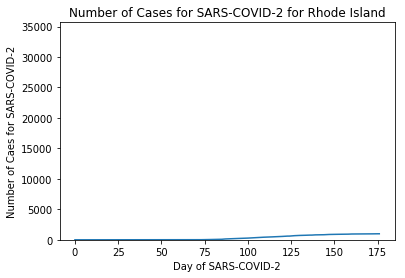

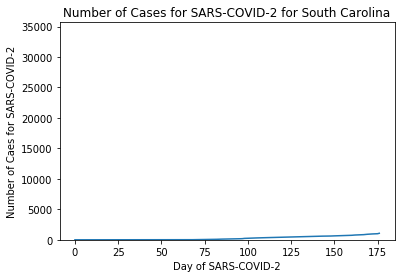

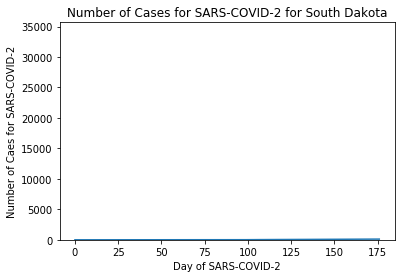

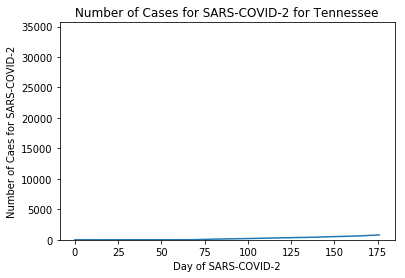

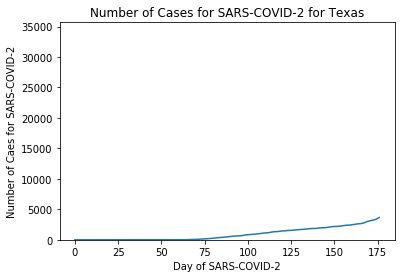

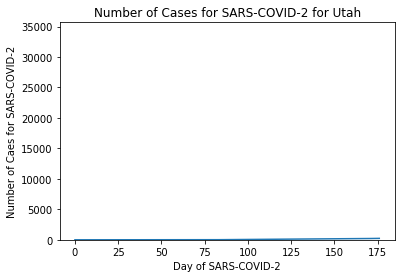

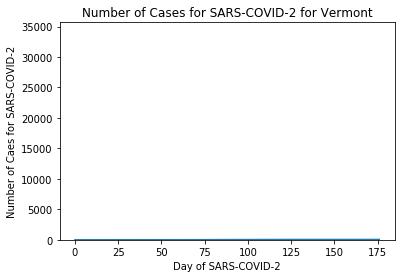

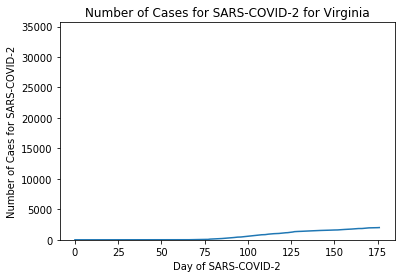

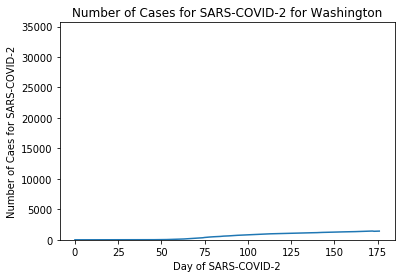

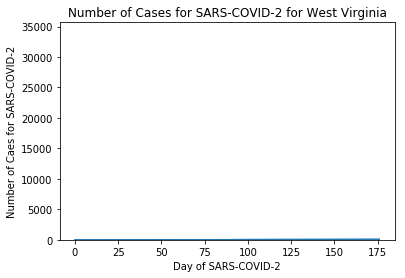

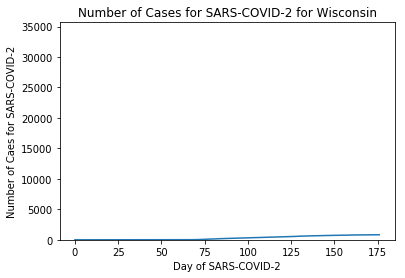

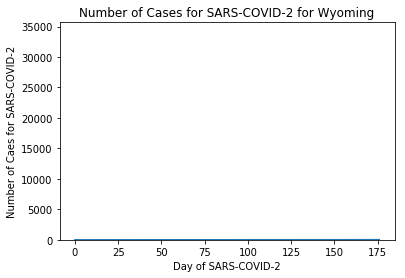

In [15]:
plotDeathsByState()

C:\Users\Quenton LaRoe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
C:\Users\Quenton LaRoe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Quenton LaRoe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


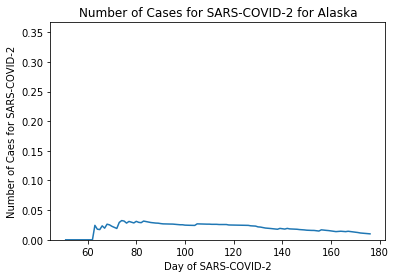

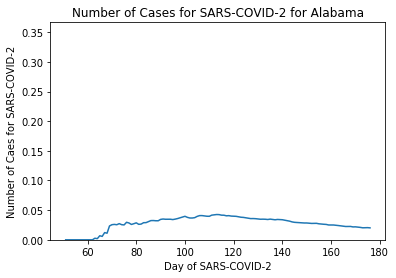

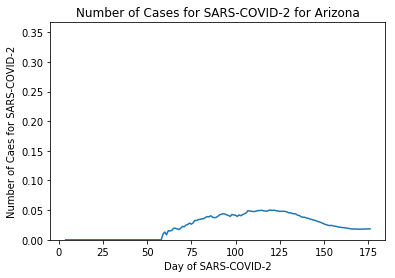

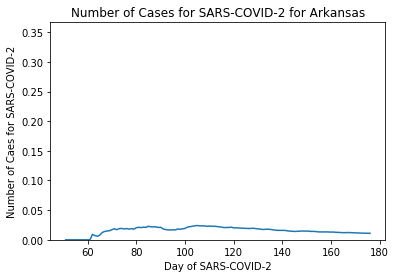

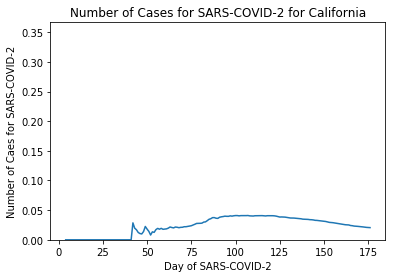

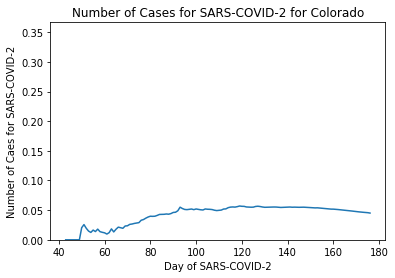

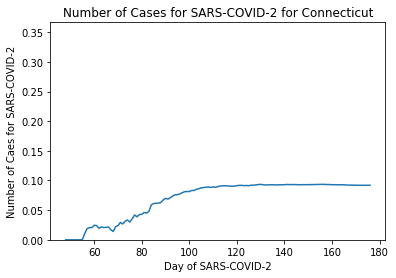

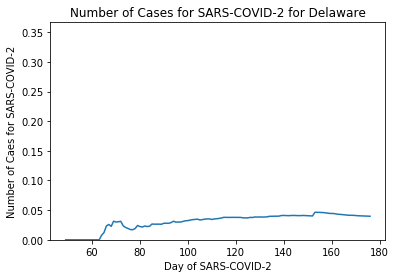

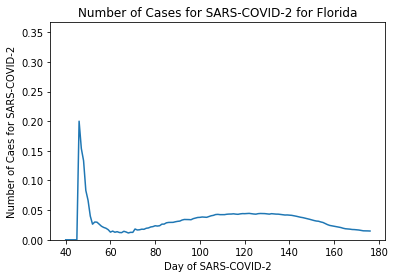

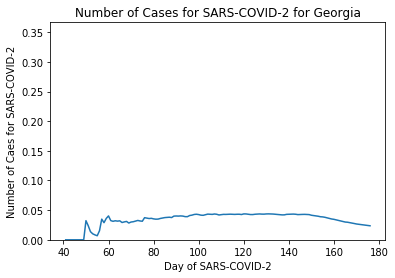

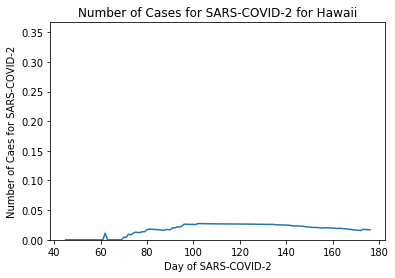

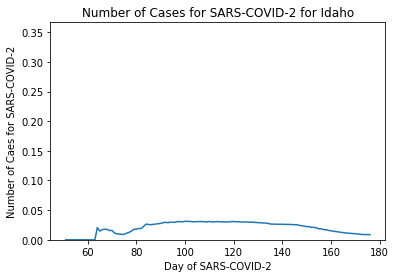

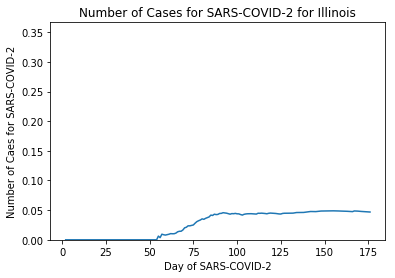

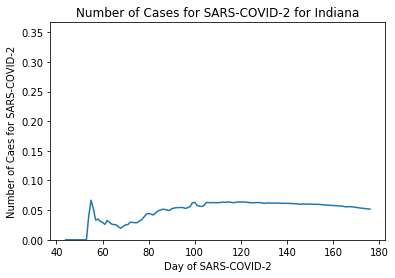

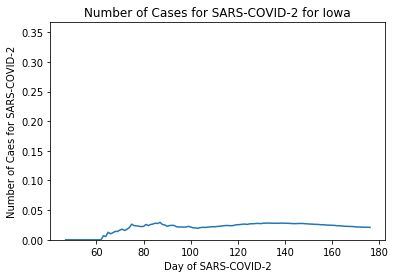

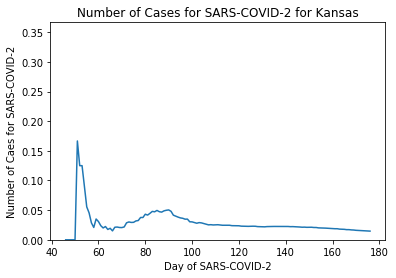

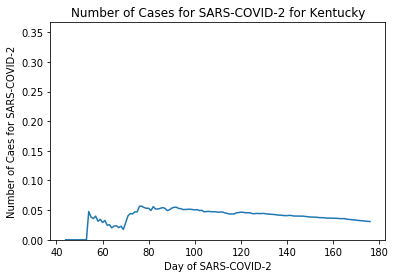

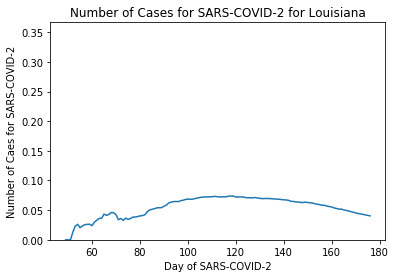

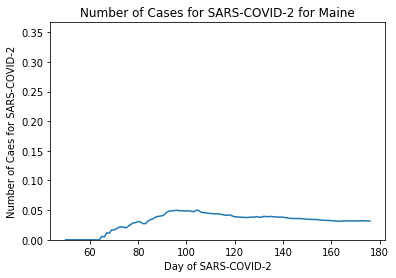

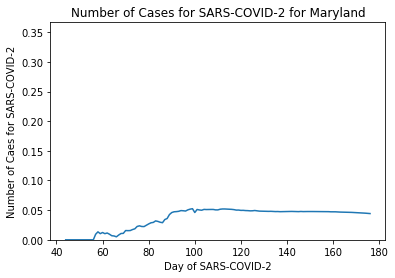

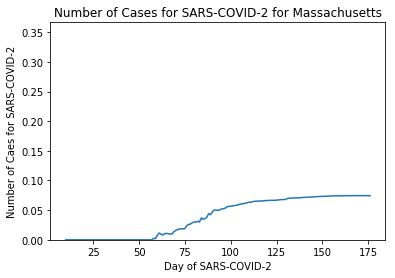

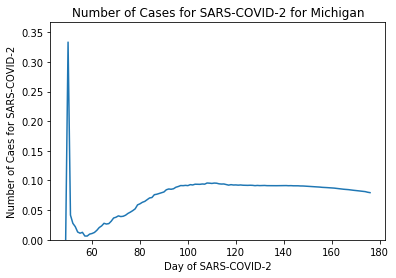

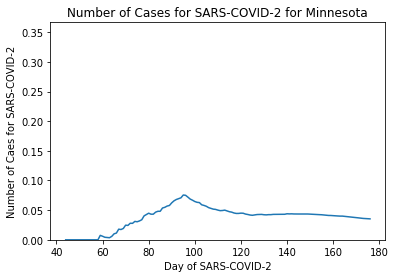

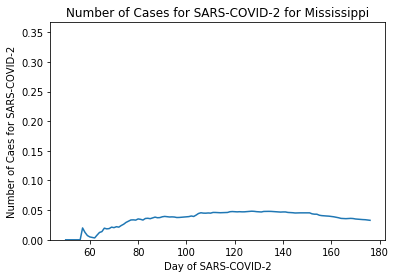

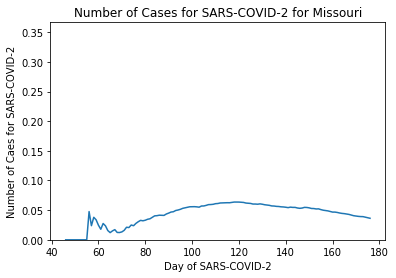

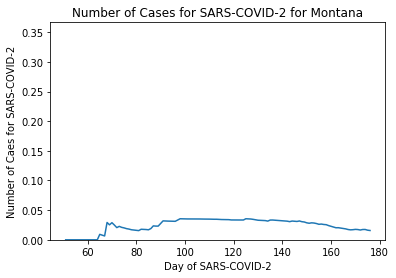

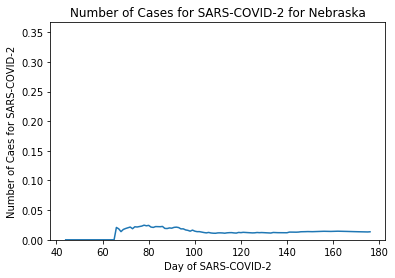

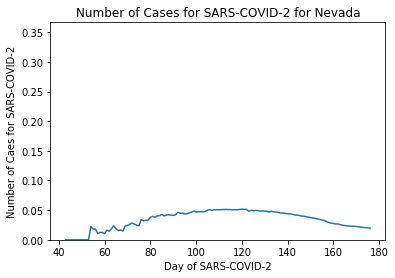

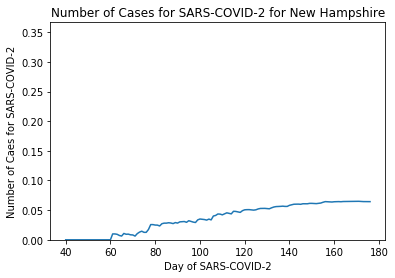

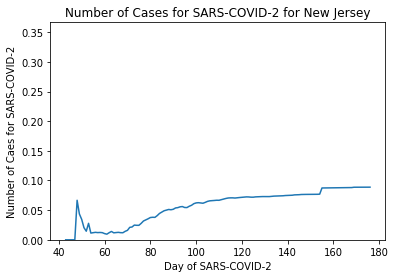

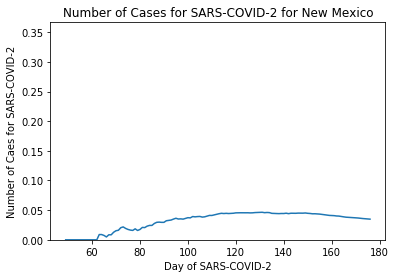

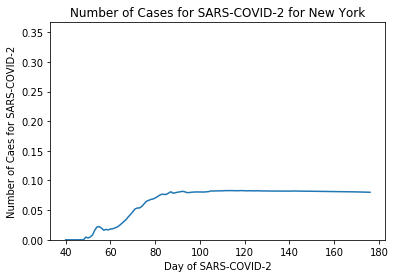

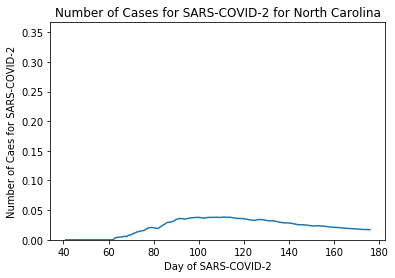

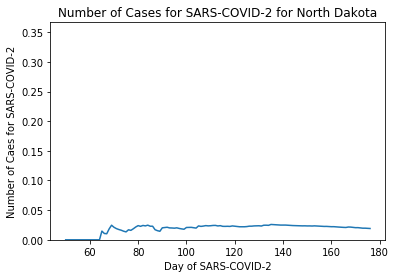

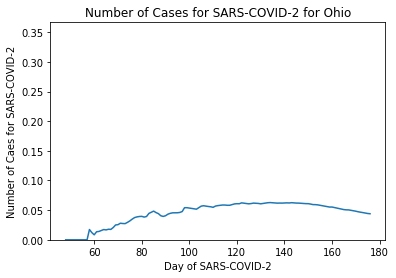

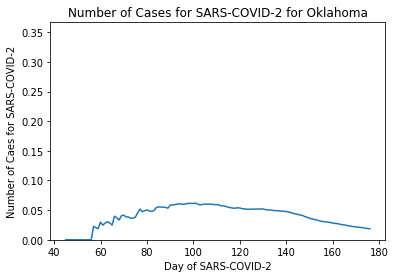

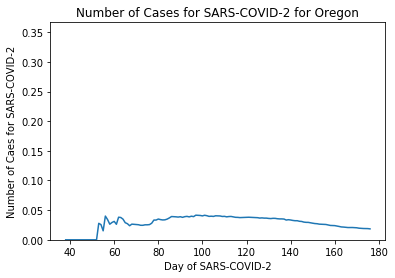

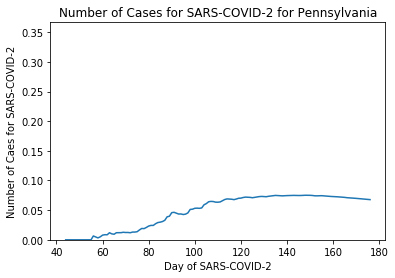

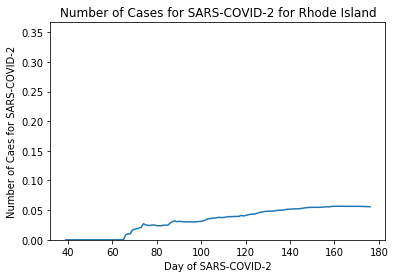

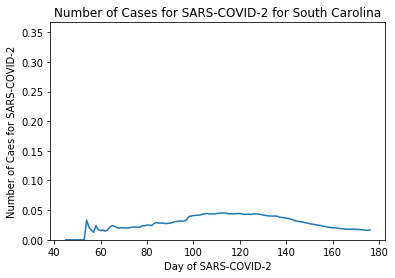

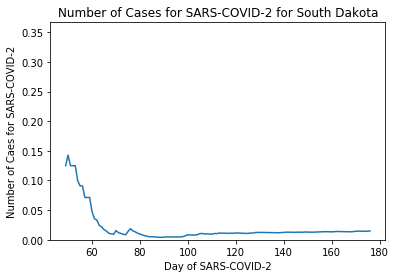

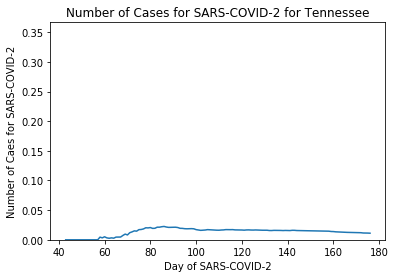

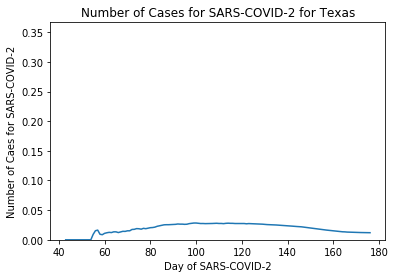

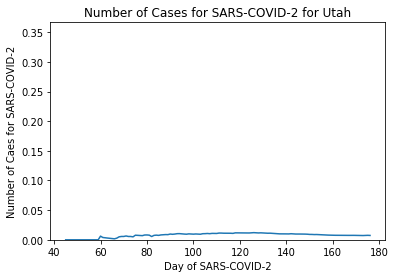

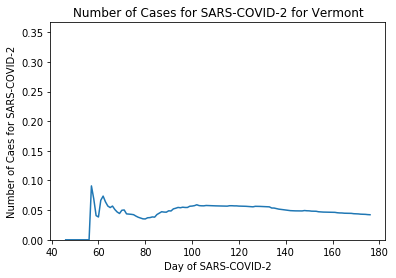

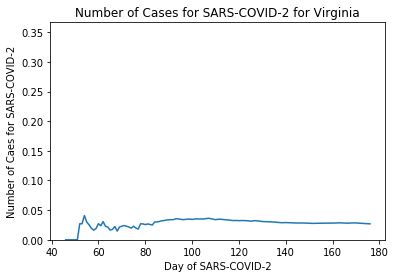

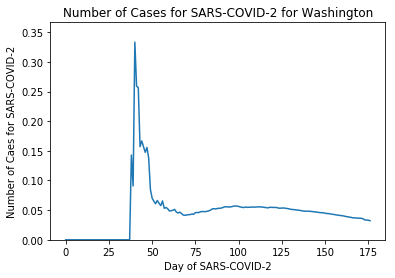

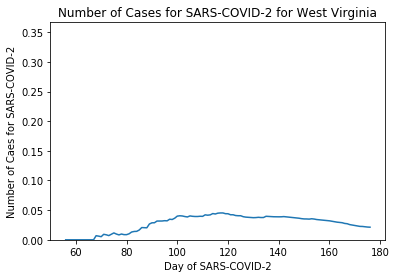

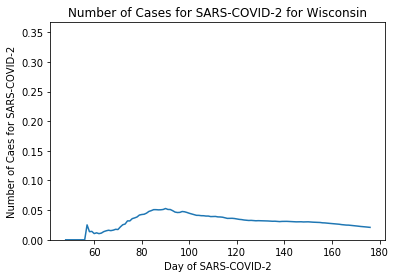

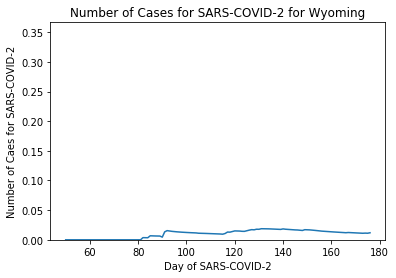

In [16]:
plotRateOfDeathsByState()

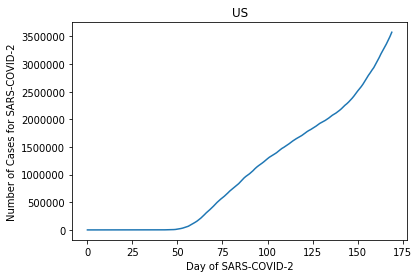

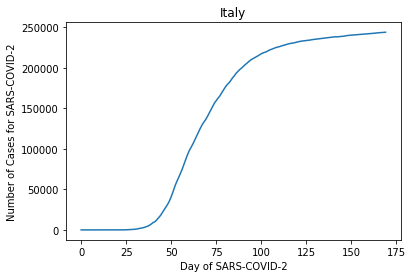

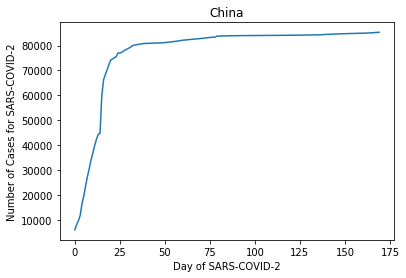

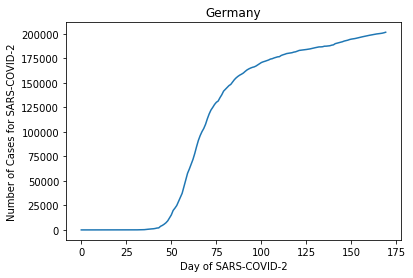

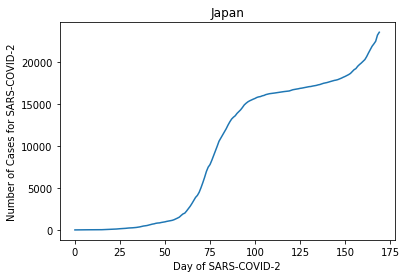

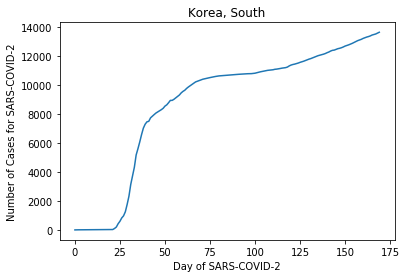

In [17]:
plotNumberOfCasesByCountry('US')
plotNumberOfCasesByCountry('Italy')
plotNumberOfCasesByCountry('China')
plotNumberOfCasesByCountry('Germany')
plotNumberOfCasesByCountry('Japan')
plotNumberOfCasesByCountry('Korea, South')

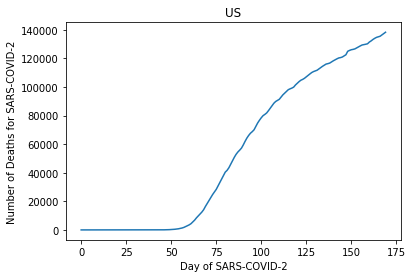

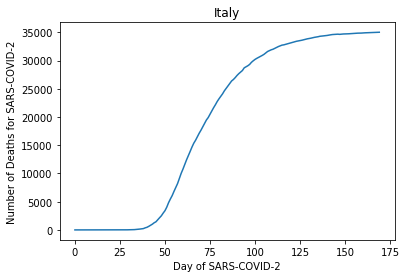

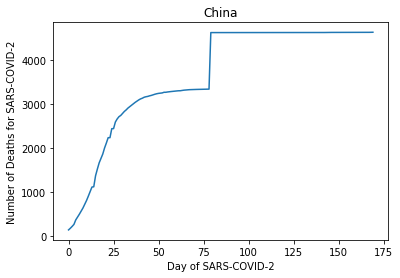

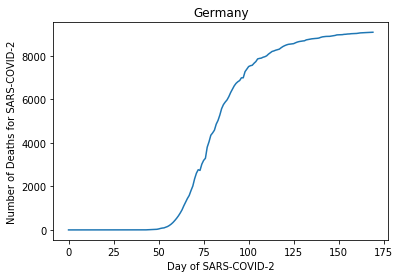

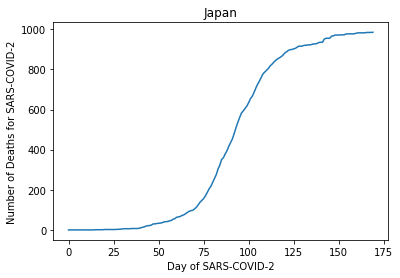

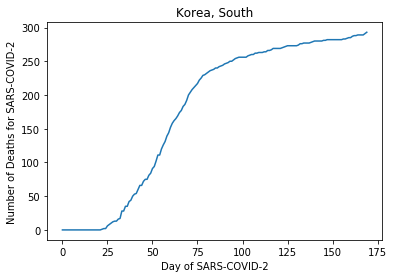

In [18]:
plotNumberOfDeathsByCountry('US')
plotNumberOfDeathsByCountry('Italy')
plotNumberOfDeathsByCountry('China')
plotNumberOfDeathsByCountry('Germany')
plotNumberOfDeathsByCountry('Japan')
plotNumberOfDeathsByCountry('Korea, South')

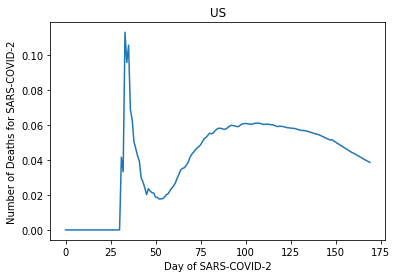

C:\Users\Quenton LaRoe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


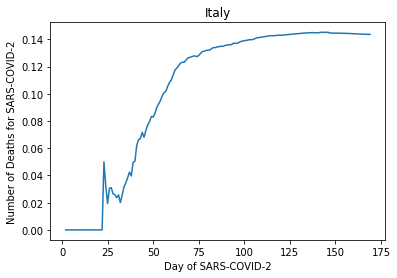

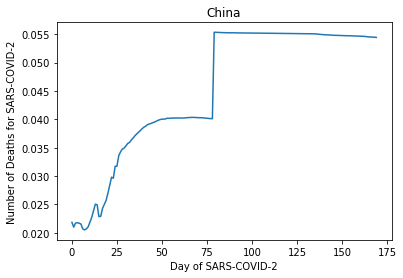

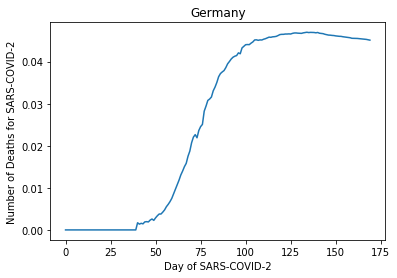

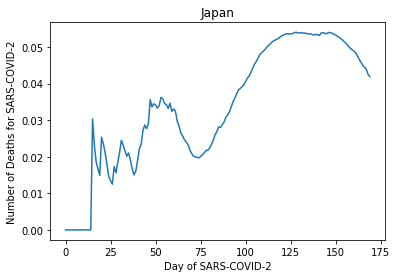

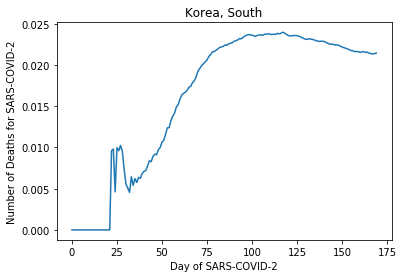

In [19]:
plotMortalityByCountry('US')
plotMortalityByCountry('Italy')
plotMortalityByCountry('China')
plotMortalityByCountry('Germany')
plotMortalityByCountry('Japan')
plotMortalityByCountry('Korea, South')